# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [183]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [75]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

Файл(Схема НС.png). 7 обучаемых параметров: {$w_{1.1}$, $w_{1.2}$, $w_{2.1}$, $w_{2.2}$, $b_{1}$, $b_{2}$, $b_{2.1}$}

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{\frac{1}{n}\partial\:(Y_i-\widehat{y}(X_i))^2}{\partial \widehat{y}(X_i)}=\frac{1}{n}\frac{\partial\:(Y_i-\widehat{y}(X_i))^2}{\partial \widehat{y}(X_i)}=-2\frac{1}{n}(Y_i-\widehat{y}(X_i))\; $$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \;  u_{h(X_i)}$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \;  w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; \frac{1}{(1+e^{-x})^2}*e^{-x}=\sigma^2(x)*e^{-x}$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; \frac{\partial \sigma(w_{1h}X_i+b_{1h})}{\partial w_{1h}}=\sigma^2(w_{1h}X_i+b_{1h})*e^{-w_{1h}X_i-b_{1h}}*X_i$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; \sigma^2(w_{1h}X_i+b_{1h})*e^{-w_{1h}X_i-b_{1h}}$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Нужно брать не все данные из обучающей выборки, а только их часть, постоянно меняя их при итерации градиентного спуска - $I=\{i\}_k, i_j \neq i_q, k\leq n$, i выбираются случайно.

**Вывод:**
Мы нашли градиент функции ошибки MSE, для нашей модели. Так же определили, что нужно делать при большом объёме данных.

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [7]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [9]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75)
    plt.scatter(x, y_pred, color='orange', linewidth=5)
    plt.title('Приближение к функции: (3*(X+1)**3 + 1)/100')
    plt.show()

    print(f"MSE = {loss:.3f}")

In [10]:
sample_size = int(1e4)
X = sps.norm.rvs(size=(sample_size, 1))
y = (3*(X+1)**3 + 1)/100

# Данные оборачиваем в тензоры, по которым не требуем вычисления градиента
x_new = torch.FloatTensor(X[:, -1])
y_new = torch.FloatTensor(y[:, -1])

In [11]:
x_new[:10]

tensor([ 0.5117, -0.8849, -0.3895, -1.1650, -0.0818,  1.2441,  1.0214,  1.5010,
         0.5596, -0.2087])

In [12]:
y_new[:10]

tensor([0.1136, 0.0100, 0.0168, 0.0099, 0.0332, 0.3490, 0.2578, 0.4793, 0.1238,
        0.0249])

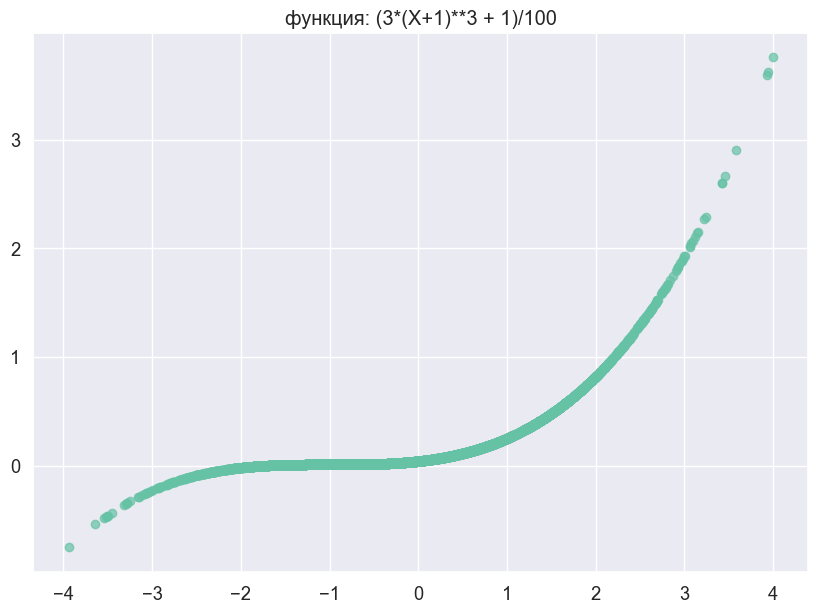

In [167]:
plt.figure(figsize=(10, 7))
plt.title('функция: (3*(X+1)**3 + 1)/100')
plt.scatter(x_new, y_new, alpha=0.7)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [14]:
print(x_new.shape)
print(y_new.shape)

torch.Size([10000])
torch.Size([10000])


In [15]:
model = nn.Sequential(
    # 1 слой: кол-во признаков во входном слое 1, в выходном 2
    nn.Linear(in_features=1, out_features=2),
    # Функция активации
    nn.Sigmoid(),
    # 2 слой: кол-во признаков во входном слое 2, в выходном 1
    nn.Linear(in_features=2, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [16]:
x_new = x_new.reshape(-1, 1)
y_new = y_new.reshape(-1, 1)

In [137]:
model(x_new)[:10]

tensor([[-0.4600],
        [-0.5713],
        [-0.3682],
        [-0.3867],
        [-0.2245],
        [-0.4086],
        [-0.3645],
        [-0.2857],
        [-0.3504],
        [-0.4629]], grad_fn=<SliceBackward0>)

In [138]:
for name, param in model.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.4679],
        [-0.7766]])
0.bias
tensor([-0.4004, -0.7863])
2.weight
tensor([[-0.4668, -0.2587]])
2.bias
tensor([-0.1010])


In [139]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
optim_func = nn.MSELoss()

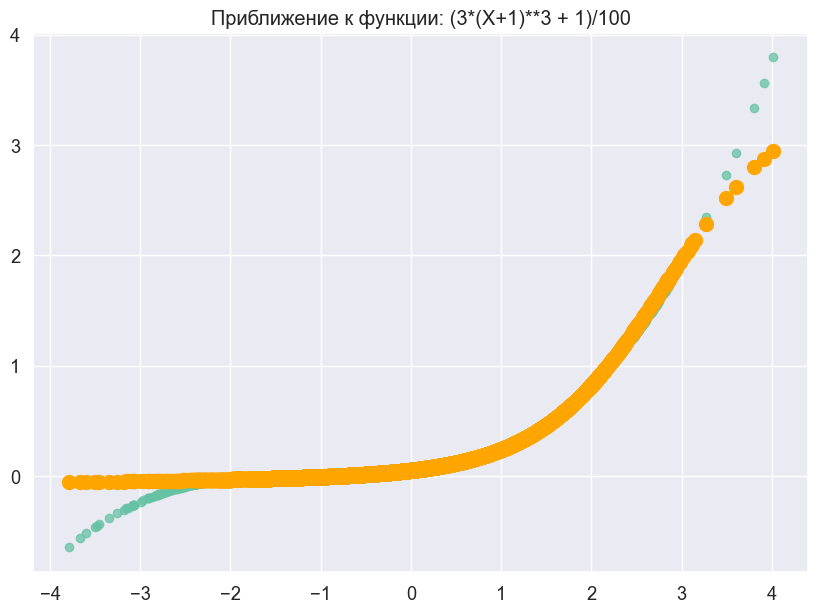

MSE = 0.001
Готово!


In [147]:
# Количество итераций
num_iter = 100000
MSE_changer = []
lr_possible = [0.0001, 0.001, 0.01, 0.1, 0.5]
possible_id = 4
for i in range(num_iter):
    
    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)
    print('iter: {}, loss: {}, lr: {}'.format(i, loss, lr_possible[possible_id % 5]))
    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    MSE_changer.append(loss)
    # Проверка изменения MSE через каждые 20 итераций:
    if (i + 1) % 20 == 0:
        if MSE_changer and max(MSE_changer)-min(MSE_changer) < 0.00001:
            possible_id += 1
            optimizer = torch.optim.SGD(model.parameters(), lr=lr_possible[possible_id % 5])
        MSE_changer = []
        
        
    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x_new, y_new, y_pred, loss)

        if loss.item() < 0.001:
            print("Готово!")
            break



Доучивание:

KeyboardInterrupt: 

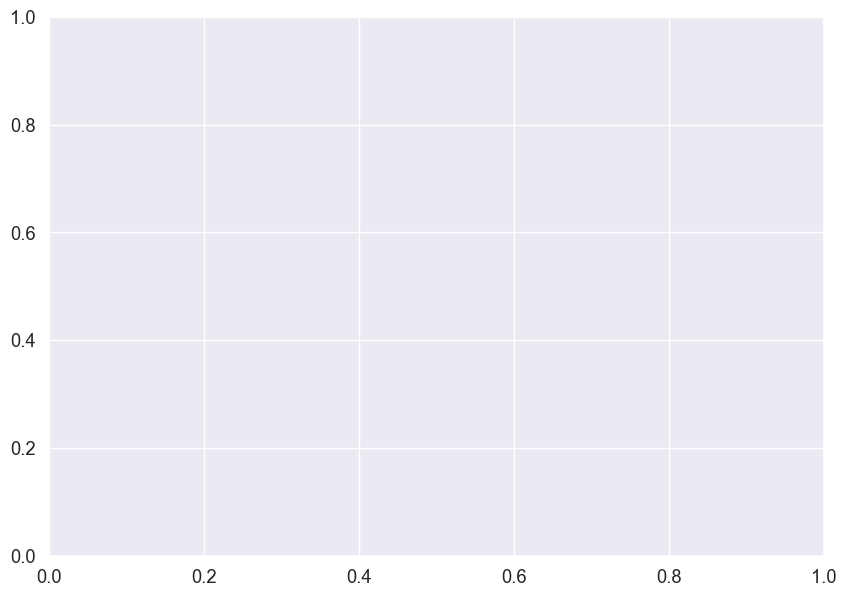

In [144]:
# Количество итераций
num_iter = 100000
MSE_changer = []
lr_possible = [0.0001, 0.001, 0.01, 0.1, 0.5]
possible_id = 4
for i in range(num_iter):
    
    # Forward pass: предсказание модели по данным x_new
    y_pred = model(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)
    print('iter: {}, loss: {}, lr: {}'.format(i, loss, lr_possible[possible_id % 5]))
    # Bakcward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    MSE_changer.append(loss)
    # Проверка изменения MSE через каждые 20 итераций:
    if (i + 1) % 20 == 0:
        if MSE_changer and max(MSE_changer)-min(MSE_changer) < 0.00001:
            possible_id += 1
            optimizer = torch.optim.SGD(model.parameters(), lr=lr_possible[possible_id % 5])
        MSE_changer = []
        
        
    # График + вывод MSE через каждые 5 итераций
    if (i + 1) % 5 == 0:
        show_progress(x_new, y_new, y_pred, loss)

        if loss.item() < 0.0001:
            print("Готово!")
            break


Остановил на 32000 эпохе, была достигнута точность в loss=0.001, ниже обученик шло крайне долго

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

In [149]:
X_test = sps.norm.rvs(size=(1000, 1))
y_test = (3*(X_test+1)**3 + 1)/100
x_test = torch.FloatTensor(X_test[:, -1])
y_test = torch.FloatTensor(y_test[:, -1])
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

y_pred = model(y_test)
loss = optim_func(y_pred, y_test)
print(loss)

tensor(0.0322, grad_fn=<MseLossBackward0>)


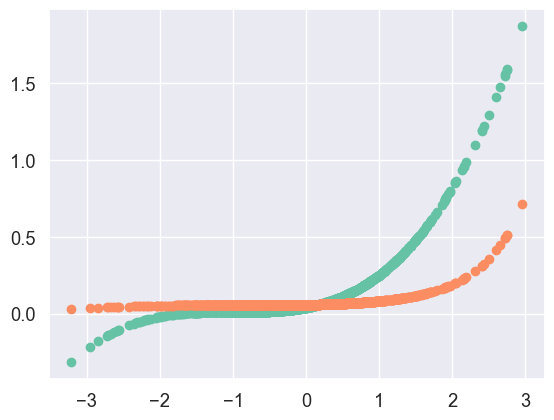

In [152]:
plt.scatter(x_test.detach().numpy(), y_test.detach().numpy())
plt.scatter(x_test.detach().numpy(), y_pred.detach().numpy())
plt.show()

Создал новые данные по тому же закону для проверки.

**Вывод:**
Модель неплохо предсказывает данные в центре, но крайне плохо по краям. Скорее всего из-за того, что в среднем данные находятся в центральной позиции.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [158]:
class neuralNetwork:

    def __init__(self, learning_rate=0.001, batch_size="auto", max_iter=500, betta_1=[0.9, 0.9], betta_2=0.999):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_iter = max_iter
        self.betta_1 = betta_1
        self.betta_2 = betta_2
        self.w1 = np.array([1, 1])
        self.w2 = np.array([1, 1])

    def sigm(self, x):
        return 1/(1 + np.exp(-x))

    def y_cir(self, x):
        return self.w2[0] * self.sigm(self.w1[0] * x + self.betta_1[0]) + self.w2[1] * self.sigm(self.w1[1] * x
                                                                                              + self.betta_1[1]) + self.betta_2
    
    def fit(self, X, y):
        dMSE_dw2 = 0
        dMSE_db2 = 0
        dMSE_u = 0
        y_cir = 0
        for i in range(self.max_iter):
            
            dMSE_dy = 2/X.shape[0] * ((self.y_cir(X) - y))
            dMSE_dw21 = dMSE_dy * self.sigm(self.w1[0] * X + self.betta_1[0])
            dMSE_dw22 = dMSE_dy * self.sigm(self.w1[1] * X + self.betta_1[1])
            dMSE_db2 = dMSE_dy

            dMSE_du1 = dMSE_dy * self.w1[0]
            dMSE_du2 = dMSE_dy * self.w1[1]
            
            dMSE_dw11 = dMSE_du1 * (self.sigm(self.w1[0] * X + self.betta_1[0]))**2 * np.exp(-self.w1[0] * X - self.betta_1[0]) * X
            dMSE_dw12 = dMSE_du2 * (self.sigm(self.w1[1] * X + self.betta_1[1]))**2 * np.exp(-self.w1[1] * X - self.betta_1[1]) * X
            dMSE_db11 = dMSE_du1 * (self.sigm(self.w1[0] * X + self.betta_1[0]))**2 * np.exp(-self.w1[0] * X - self.betta_1[0])
            dMSE_db12 = dMSE_du2 * (self.sigm(self.w1[1] * X + self.betta_1[1]))**2 * np.exp(-self.w1[1] * X - self.betta_1[1])


            self.w2[0] -= np.mean(self.learning_rate * dMSE_dw21)
            self.w2[1] -= np.mean(self.learning_rate * dMSE_dw22)
            self.betta_2 -= np.mean(self.learning_rate * dMSE_db2)

            self.w1[0] -= np.mean(self.learning_rate * dMSE_dw11)
            self.w1[1] -= np.mean(self.learning_rate * dMSE_dw12)
            self.betta_1[0] -= np.mean(self.learning_rate * dMSE_db11)
            self.betta_1[1] -= np.mean(self.learning_rate * dMSE_db12)
    
    def predict(self, x):
        return self.y_cir(x)

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [159]:
sample_size = int(1e4)
X = sps.norm.rvs(size=(sample_size, 1))
y = (3*(X+1)**3 + 1)/100

In [160]:
model1 = neuralNetwork(learning_rate=0.5, max_iter=1000000, batch_size=10)
model1.fit(X, y)

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
model2 = LinearRegression(fit_intercept=True)
model2.fit(X, y)

LinearRegression()

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

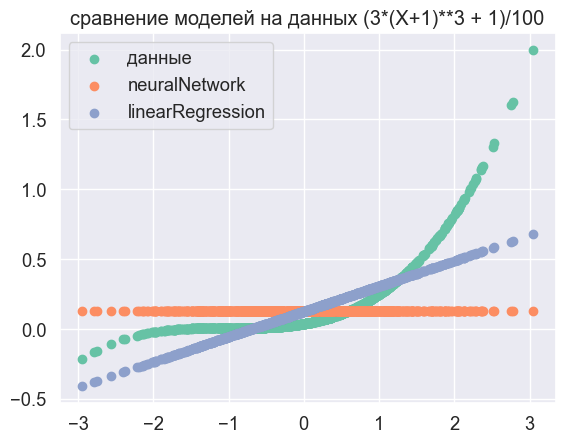

In [173]:
X_test = sps.norm.rvs(size=(1000, 1))
y_test = (3*(X_test+1)**3 + 1)/100
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)


plt.scatter(X_test, y_test, label='данные')
plt.scatter(X_test, y_pred, label='neuralNetwork')
plt.scatter(X_test, y_pred2, label='linearRegression')
plt.title('сравнение моделей на данных (3*(X+1)**3 + 1)/100')
plt.legend()
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [176]:
sample_size = int(1e4)
X = sps.norm.rvs(size=(sample_size, 1))
y = X**2 / 10

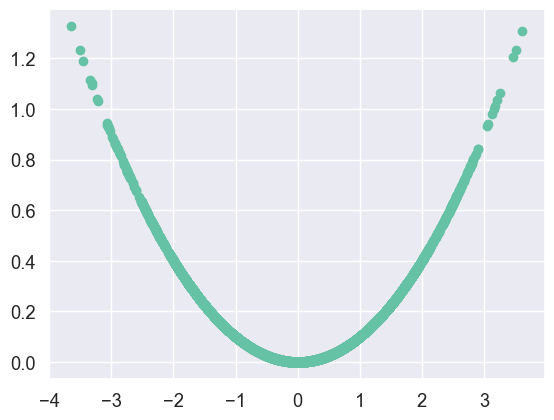

In [177]:
plt.scatter(X, y)

In [178]:
model1 = neuralNetwork(learning_rate=0.5, max_iter=10000000, batch_size='auto')
model1.fit(X, y)

KeyboardInterrupt: 

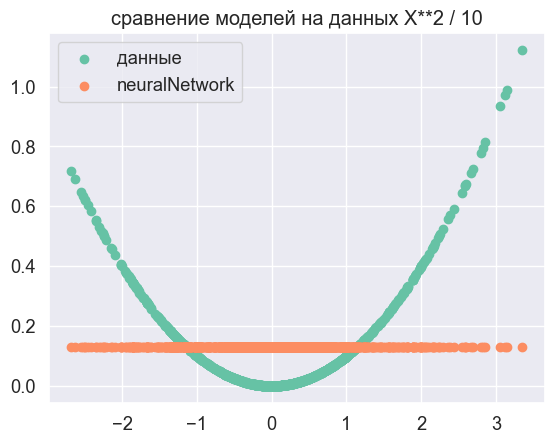

In [182]:
X_test = sps.norm.rvs(size=(1000, 1))
y_test = X_test**2 / 10
y_pred1 = model1.predict(X_test)

plt.scatter(X_test, y_test, label='данные')
plt.scatter(X_test, y_pred, label='neuralNetwork')
plt.title('сравнение моделей на данных X**2 / 10')
plt.legend()
plt.show()

**Вывод:**
Что-то сделано неправильно: неправильно реализована модель, неправильный lr, слишком мало модель обучается(40 мин). Но по графику видно, что данные принимают среднее значение, аналогично было во 2 задании => склонен считать, что происходит недообучение.